## Introduction

Nous considérons ici un flux de voiture sur une autoroute à une bande. On aimerait connaitre la densité de voitures présentes sur cette autoroute ainsi que la vitesse du trafic. Une équation possible pour cette dernière est

\begin{equation} V = V_{max} (1 - \frac{\rho}{\rho_{max}})
\end{equation}

Si le flux $F$ est égal à 
\begin{equation} F = V \rho
\end{equation}
alors, nous avons l'équation différentielle partielle suivante :
\begin{equation} \frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0 \end{equation}

En dérivant $F$ par rapport à $x$, on obtient une équation ne dépendant que de $ \rho $ :

$$ \frac{\partial \rho}{\partial t} + V_{max}(1 - \frac{2 \rho}{\rho_{max}}) \frac{\partial \rho}{\partial x} = 0
$$

On peut alors commencer à résoudre numériquement le problème.
On débute par l'initialisation des constantes.

In [98]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams

In [99]:
v_m=80
L=11
rho_m=250 #densité maximale

Pour éviter de devoir calculer la vitesse $V$ à chaque fois, on définit ici une fonction vitesse.

In [100]:
def V (rho0):
    return numpy.array((v_m*(1-rho0/rho_m))/3.6)

## Partie A

Pour la partie A, on commence avec la fonction suivante (un signal carré) qui donne la densité suivante (voir graphique) : 

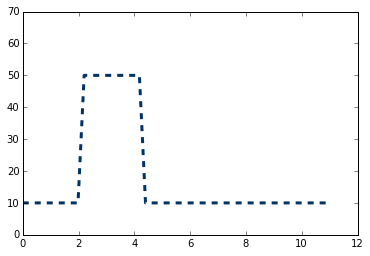

In [101]:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,70);

Pour calculer la vitesse minimale à l'instant $t = 0$, on introduit la fonction $\rho_0$ dans notre fonction vitesse. Ensuite, on en prend le minimum grâce à la fonction min de numpy.

In [102]:
V(rho0)
m = numpy.min (V(rho0))
print("La vitesse minimale à t=0 est",m,"m/s")

La vitesse minimale à t=0 est 17.7777777778 m/s


Ensuite, on va calculer la densité pour $t=3$ minutes. Pour cela, on utilise l'approximation suivante : 

\begin{equation} \frac{\partial \rho}{\partial x}\approx \frac{\rho(x+\Delta x)-\rho(x)}{\Delta x}\end{equation}

On va discrétiser notre temps et notre espace. On définit donc un pas $\Delta t$ et $\Delta x$ ainsi qu'un nombre d'itérations $nx$ et $nt$. Il ne faut pas que le pas $\Delta x$ soit trop petit pour garder une certaine stabilité. 


In [103]:
nx=51
dt=0.001
nt=100
dx=L/(nx-1)

Pour la discrétisation, on note la i-ème itération dans l'espace comme $\rho_i$ et la n-ème itération dans le temps comme $\rho^n$. Les deux notations combinées, on a $\rho_i^n$.
Avec notre nouvelle notation, les approximations des dérivées partielles deviennent :

\begin{equation}\frac{\partial \rho}{\partial x}\approx \frac{\rho_i^n - \rho_{i-1}^n}{\Delta x} \end{equation}
\begin{equation}\frac{\partial \rho}{\partial t}\approx \frac{\rho_i^{n+1}-\rho_i^n}{\Delta t} \end{equation}

Lorsque l'on met cela dans notre équation aux dérivées partielles par rapport à $\rho$, on obtient

$$\frac{\rho_i^{n+1}-\rho_i^n}{\Delta t} + V_{max}(1 - \frac{2 \rho_i^n}{\rho_{max}}) \frac{\rho_i^n - \rho_{i-1}^n}{\Delta x} = 0
$$

On remarque alors que la seule inconnue est $\rho_i^{n+1}$. Lorsque l'on isole, on obtient :

$$\rho_i^{n+1} = \rho_i^n - V_{max}(1 - \frac{2 \rho_i^n}{\rho_{max}}) (\rho_i^n - \rho_{i-1}^n) \frac{\Delta t}{\Delta x}$$

On peut maintenant lancer l'itération. À chaque instant $t$, on calcul la densité $\rho$ sur tout notre espace (ici de $0$ à $L$)

In [104]:
for n in range(1,50):  
  un = rho0.copy() 
  for i in range(1,nx): 
    rho0[i] = un[i]-v_m*(1-2*un[i]/rho_m)*dt/dx*(un[i]-un[i-1])

Nous possédons maintenant notre densité $\rho$ à $t=3$ minutes. Voyons ce que cela donne en graphique

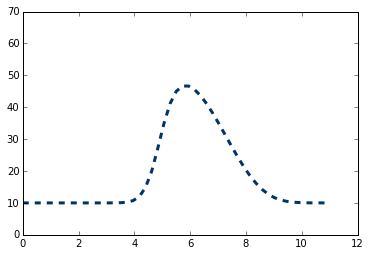

In [105]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,70);

Nous pouvons à présent calculer la vitesse moyenne de notre trafic à cet instant précis. Pour cela, nous envoyons le tableau $\rho$ dans notre fonction vitesse et nous en calculons la moyenne.

In [106]:
V(rho0)
m=numpy.average(V(rho0))
print("La vitesse moyenne à t=3 min est",m,"m/s")

La vitesse moyenne à t=3 min est 20.5626526038 m/s


Nous allons maintenant calculer la densité en $t=6$ min. Comme notre tableau de densité du trafic a été modifié, nous le réinitialisons en $t=0$.

In [107]:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50

Nous pouvons maintenant calculer $\rho$ après 6 minutes et voir à quoi notre densité ressemble.

In [108]:
for n in range(1,nt):  
  un = rho0.copy() 
  for i in range(1,nx): 
    rho0[i] = un[i]-v_m*(1-2*un[i]/rho_m)*dt/dx*(un[i]-un[i-1])

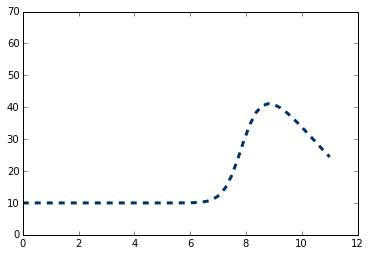

In [110]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,70);

Comme précédemment, nous calculons la vitesse minimale.

In [88]:
V(rho0)
m = numpy.min (V(rho0))
print("La vitesse minimale à t=6 min est",m,"m/s")

La vitesse minimale à t=6 min est 18.5661281915 m/s


## Partie B

Pour la partie B, la vitesse maximale est augmentée ainsi que la densité de voitures. On utilise les  mêmes méthodes que pour la partie A.

In [89]:
v_m=136 #nouvelle vitesse maximale

In [90]:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50

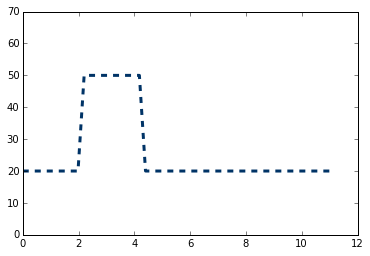

In [91]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,70);

In [92]:
V(rho0)
m = numpy.min (V(rho0))
print("La vitesse minimale à t=0 est",m,"m/s")

La vitesse minimale à t=0 est 30.2222222222 m/s


In [93]:
for n in range(1,50):  
  un = rho0.copy() 
  for i in range(1,nx): 
    rho0[i] = un[i]-v_m*(1-2*un[i]/rho_m)*dt/dx*(un[i]-un[i-1])

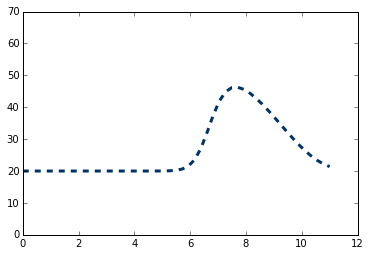

In [94]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,70);

In [95]:
V(rho0)
m = numpy.average(V(rho0))
print("La vitesse moyenne à t=3 min est",m,"m/s")

La vitesse moyenne à t=3 min est 33.7641357386 m/s


In [97]:
m =numpy.min(V(rho0))
print("La vitesse minimale à t=3 min est",m,"m/s")

La vitesse minimale à t=3 min est 30.7847240487 m/s


## Conclusion

On remarque que bien que l'on commence avec un signal carré, après un certain nombre d'itérations, ce signal se courbe. Cela est du au fait que nous avons approximé une équation continue par une equation discrétisée.
De plus, la courbe est assymétrique car notre équation est non-linéaire.